# Test de chi-cuadrado

El método Chi-cuadrado, es considerado como una prueba no paramétrica que mide la discrepancia entre una distribución observada y otra teórica, indicando en qué medida existen diferencias entre ambas, por medio de una prueba de hipótesis PH.

El método de prueba de hipótesis supone a priori el valor de un parámetro y sobre la base de la información obtenida en una muestra, somete a prueba la suposición, para luego tomar con cierta probabilidad, la decisión de rechazar o no la hipótesis.

La prueba de hipótesis PH es un procedimiento que le proporciona al investigador un criterio objetivo para tomar decisiones con base a un número limitado de observaciones.

En este ejercicio se busca diseñar, implementar y verificar una función que calcule el test de “chi-cuadrado” para comparar un histograma con un modelo dado por una distribución Binomial, $B(n=10, p=0.4)$.

Se realizan los siguientes puntos:


## (a) Simule 100 observaciones de la V.A. binomial y calcule las frecuencias de cada valor.

In [1]:
from scipy import stats as st
#from math import *
import numpy as np
import matplotlib.pyplot as plt
#import random
import seaborn as sns

In [2]:
sns.set()

Se sortea 100 veces una variable aleatoria binomial con la función de 'st.binom.rvs', definiendo la función 'empirica_bi()'.

In [3]:
def empirica_bi():
    lista=[]
    for i in range(100):        #veces que sorteo la variable
        x=st.binom.rvs(10, 0.4) #da variables aleatorias siguiendo la distribucion binomial
        lista.append(x)         #las agrego en una lista
    return lista 

Se grafican en un histograma para ver su distribución

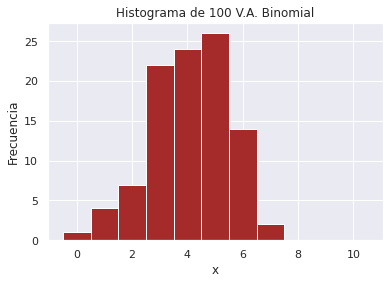

In [4]:
f=plt.hist(empirica_bi(), bins=np.arange(-0.5, 11.5, 1), color='brown')

plt.title('Histograma de 100 V.A. Binomial')
plt.xlabel('x')
plt.ylabel('Frecuencia')
plt.show()

In [5]:
#Frecuencias
fi_bi=f[0]
print('Las frecuencias empíricas de cada x son:', fi_bi)

Las frecuencias empíricas de cada x son: [ 1.  4.  7. 22. 24. 26. 14.  2.  0.  0.  0.]


## (b) Calcule el estadı́stico $\chi^2$ a partir del modelo y de los datos simulados.

Primero se construye la distribución de probabilidad binomial teórica usando la función 'st.binom.pmf'.

In [6]:
teo_bi_rel=st.binom.pmf(k=np.arange(11), n=10, p=0.4)  #frecuencias teóricas relativas

Como se quiere comparar con la distribución empírica calculada en (a), se deben covertir las frecuencias teóricas relativas a absolutas, para ello se multiplican las frecuencias obtenidas por 100 (número de V.A.)

In [7]:
teo_bi=teo_bi_rel*100

Debajo se grafica esta distribución junto con la distribución empírica construída en el inciso (a).

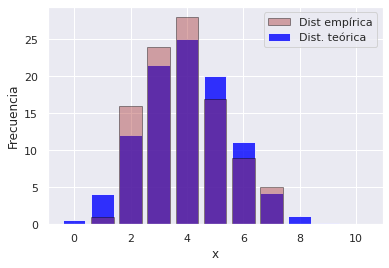

In [8]:
#Teorica
plt.bar(np.arange(11), teo_bi, color='blue', alpha=0.8, label='Dist. teórica')

#Empirica
plt.hist(empirica_bi(), bins=np.arange(-0.5, 11.5, 1), color='brown', label='Dist empírica', alpha=0.4, ec='black', rwidth=0.8)

plt.xlabel('x')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.show()

### Estadístico chi-cuadrado:

$$\chi^2=\sum_{i=0}^{n} \frac{(f_i - fteo_i)^2}{fteo_i}$$

donde $f_i$ indica la frecuencia empírica observada (calculada en el inciso a) y $fteo_i$ indica la frecuencia de la distribución teórica.

Para calcularlo se define la función 'chi2()' que compara las frecuencias de una lista (f) con las frecuencias teóricas absolutas de una función que se ingrese. 

In [9]:
chi2=0
for i in range(len(fi_bi)):
    chi2=chi2+((fi_bi[i]-teo_bi[i])**2/teo_bi[i])
print('Chi-cuadrado:',chi2)

Chi-cuadrado: 7.365035371180048


## (c) Realice una prueba de hipótesis completa para decidir si los datos están en acuerdo con el modelo.

1. Hipótesis

*Hipótesis nula:* 
$H_0$= La muestra de la distribución empírica sigue la distribución Binomial (teórica)

*Hipótesis alternativa:*
$H_1$= La muestra de la distribución empírica no sigue la distribución Binomial (teórica)

2. Nivel de significación

El establecimiento del lı́mite de significación define dos zonas en la distribución de valores del estadı́stico: a) una zona de aceptación de $H_0$, dentro de la cual las diferencias entre el estadı́stico y el parámetro no son significativas, y b) una zona de rechazo de $H_0$ dentro de la cual las diferencias entre el estadı́stico y el
parámetro son significativas.

Se decide tomar:

$$\alpha=0.05$$

para obtener un IC del $95 \%$

3. Estadı́stico de prueba

Se elije el estadístico chi-cuadrado, cuya fórmula y calculo se realizó en el inciso (b).

4. Zona de aceptación

La zona de aceptación de $H_0$ está formada por los valores del estadı́stico de prueba que ocurren con una probabilidad mayor a la establecida en el nivel de significación. Por el contrario, la zona de rechazo está formada por todos los valores del estadı́stico de prueba cuya probabilidad de ocurrencia es igual o menor al valor establecido en el nivel de significación. 

Así se tiene:

Zona de aceptación: $\chi^2 < \chi_{(1-\alpha);gl}^2$

Zona de rechazo: $\chi^2 > \chi_{(1-\alpha);gl}^2$

donde $\alpha$ es el nivel de significación y $gl$ los grados de libertad.

5. Cómputos necesarios


In [10]:
print('Valor de chi-cuadrado:', chi2)

Valor de chi-cuadrado: 7.365035371180048


Grados de libertad:

$$gl= Num\ de\ variables (x) - Num\ de\ restricciones$$

donde número de x es: 0,1,2...10 =11 y el número de restricciones es 1 (suma de probabilidades igual a 1). Luego:

$$gl=10$$

Además:

$$1-\alpha = 0.95$$



Buscando en las tablas de probabilidad acumulada de la distribución de probabilidad de $\chi^2$, para gl=10 y $\alpha=0.05$, se encuentra que el valor crítico para chi-cuadrado es:

$$\chi_{(1-\alpha);gl}^2 = \chi_{crit}^2 = 18.31$$

6. Decisión

Como el valor de $\chi^2$ obtenido es menor a 18.31, el estadístico de prueba cae en la zona de aceptación, por lo que se acepta la hipótesis nula.
No existe suficiente evidencia para rechazarla.

7. Conclusión

Se concluye que la distribución empírica formada con 100 VA binomiales sigue la distribución Binomial teórica.

## (d) Calcule el valor-p de la prueba.

El valor-p se puede calcular de la siguiente forma:

$$pvalue=P(\chi^2>\chi_0^2 | H_0)=1-P(\chi^2<\chi_0^2)= 1- F(\chi_0^2)$$

donde $\chi^2$ la variable aleatoria estadístico chi-cuadrado y $\chi_0^2$ el valor calculado, P la función probabilidad de la distribución del estadístico de prueba y F la función acumulada.

Para calcular la función acumulada de la distribución de $\chi^2$ se usa la función 'st.chi2.cdf' la cual recibe como primer argumento el valor de $\chi_0^2$ y como segundo los grados de libertad.

In [11]:
#Hago un funcion que calcule el valor de p
def pvalue(chi,gl):
    acum=st.chi2.cdf(chi, gl) #acumulada
    p=1-acum #valor de p
    return p

In [12]:
print('El valor-p de la prueba es:', pvalue(chi2,10))

El valor-p de la prueba es: 0.6905921666571411


Se puede ver que el valor-p obtenido es mayor al nivel de significación 0.05, lo cual no permite rechazar la hipótesis alternativa, coincidiendo con lo que se vio en el inciso (c).

## (e) Simule muestras de 100 observaciones de una V.A. N($\mu$, $\sigma$), con $\sigma$=2.5 y $\mu$ que varı́e entre 2 y 7. Estudie cómo varı́a el valor-p y determine si en algún rango de $\mu$ se puede “confundir” el modelo.


Se comienza definiendo una función que genere muestras de 100 variables aleatorias normales con $\sigma=2.5$ y $\mu$ como parámetro libre al cual se le pueda indicar cualquier valor.

In [13]:
def empirica_normal(u):
    lista=[]
    for i in range(100):      #veces que sorteo la variable
        x=st.norm.rvs(loc=u, scale=2.5) #con 2.5 indico el sigma
        lista.append(x)       #las agrego en una lista
    return lista

Para comparar se consideran los valores de $\mu$ discretos entre 2 y 7. A continuación se grafican junto con la distribución teórica binomial en el mismo grafico ya que es con la que se quiere comparar. Se tiene en cuenta de realizarlo con el mismo bineado que la binomial.
Para ello se define la binomial en ese intervalo.

In [14]:
teo_bi_rel2=st.binom.pmf(k=np.arange(-4,15,1), n=10, p=0.4) #relativa

In [15]:
teo_bi2=teo_bi_rel2*100

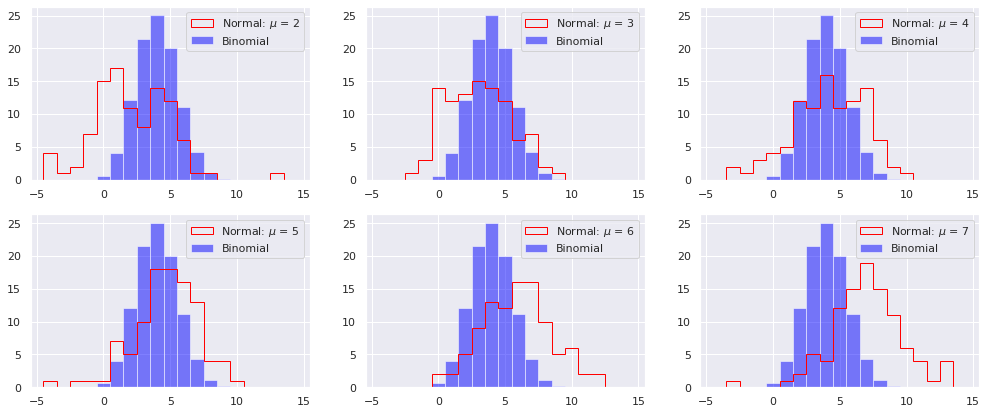

In [16]:
frec_norm=[]
plt.figure(figsize=(17,7))

for i in [1,2,3,4,5,6]:  #posición en el gráfico
    plt.subplot(2,3,i)   #figura con 2 filas y 3 columnas
    
    #Grafico la binomial teorica
    plt.bar(np.arange(-4,15,1), teo_bi2, width=1, color='blue', alpha=0.5, label='Binomial')
    
    #Grafico las distintas normales, quiero mu=2,3,4,5,6,7
    h=plt.hist(empirica_normal(i+1), bins=np.arange(-4.5, 15.5, 1), histtype='step', ec='red', label='Normal: $\mu$ = '+ str(i+1))
    plt.legend(loc='best')
    frec_norm.append(h) #agrego las frecuencias a una lista
    

Se calcula los $\chi^2$ para cada $\mu$ usando la función "chi2(f)" donde f es una lista con las frecuencias de la distribución a comparar, las cuales se encuentran guardadas en la lista 'frec_norm'. Se realiza para cada distribución normal aleatoria graficada.

Nota: se tomó el bineado igual a los de la distribución binomial. Al calcular el estadístico $\chi^2$ se ingresa la frecuencia teórica binomial en el denominador, si se consideran valores de 'x' tal que $x<0$ o $x>10$ están fuera del dominio por lo que tienen frecuencias nulas, en el código se tiene cuidado de indicar esto.

In [17]:
#funcion que calcula chi-cuadrado 
def chi_square(f,teo):
    chi2=0
    for i in range(len(f)):
        if teo[i] != 0:
            chi2=chi2+((f[i]-teo[i])**2/teo[i])
        else:
            continue
    return chi2

In [18]:
#ejemplo: frecuencias para el caso con u=2
frec_norm[0][0] 

array([ 4.,  1.,  2.,  7., 15., 17., 11.,  8., 14., 12.,  6.,  1.,  1.,
        0.,  0.,  0.,  0.,  1.,  0.])

Valores de chi-cuadrado comparando cada normal con la disstribución binomial:

In [19]:
chi_norm=[]
for k in [0,1,2,3,4,5]:
    w=chi_square(frec_norm[k][0], teo_bi2)
    print('Para u=',k+2, 'se tiene chi2=', w)
    chi_norm.append(w)

Para u= 2 se tiene chi2= 406.1817224033057
Para u= 3 se tiene chi2= 332.19469032689324
Para u= 4 se tiene chi2= 192.21287848066595
Para u= 5 se tiene chi2= 230.51519805646586
Para u= 6 se tiene chi2= 3704.9660291240416
Para u= 7 se tiene chi2= 4449.198518063098


En este caso se tiene: gl= 19-1=18 y $\alpha$=0.05. Luego, $\chi_{crit}^2$=28.869.

Como todos los valores obtenidos son mayores al $\chi_{crit}^2$, por lo tanto, se rechaza la hipótesis nula para todos los casos.

Valores-p para cada caso:

In [20]:
for k in range(len(chi_norm)):
    p=pvalue(chi_norm[k],18)
    print('Para u=',k+2, 'se tiene valor-p=', p)

Para u= 2 se tiene valor-p= 0.0
Para u= 3 se tiene valor-p= 0.0
Para u= 4 se tiene valor-p= 0.0
Para u= 5 se tiene valor-p= 0.0
Para u= 6 se tiene valor-p= 0.0
Para u= 7 se tiene valor-p= 0.0


Lo obtenido coincide con el rechazo de la hipótesis nula.

Se puede ver que uno esperaría que la distribución binomial coincida con alguna distribución normal, sin embargo, no es lo que se obtiene al realizar la prueba de hipótesis con el estadístico $\chi^2$.

## (f) Realizar lo mismo pero en lugar de sortear 100 randoms (como en (e)) hay que sortear 1000.

In [21]:
teo_bi3=teo_bi_rel2*1000 #1000 valores sorteados

In [22]:
def empirica_normal2(u):
    lista=[]
    for i in range(1000): #veces que sorteo la variable
        x=st.norm.rvs(loc=u, scale=2.5) #con 2.5 indico el sigma
        lista.append(x) #las agrego en una lista
    return lista

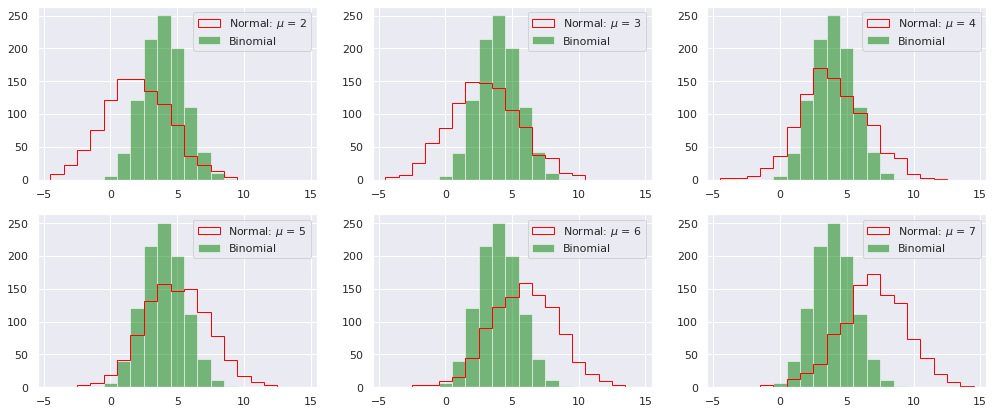

In [23]:
frec_norm2=[]
plt.figure(figsize=(17,7))

for i in [1,2,3,4,5,6]:  #posición en el gráfico
    plt.subplot(2,3,i)   #figura con 2 filas y 3 columnas
    
    #Grafico la binomial teorica
    plt.bar(np.arange(-4,15,1), teo_bi3, width=1, color='green', alpha=0.5, label='Binomial')
    
    #Grafico las distintas normales, #quiero mu=2,3,4,5,6,7
    f2=plt.hist(empirica_normal2(i+1), bins=np.arange(-4.5, 15.5, 1), histtype='step', ec='red', label='Normal: $\mu$ = '+ str(i+1))
    plt.legend(loc='best')
    frec_norm2.append(f2) #agrego las frecuencias a una lista

In [24]:
chi_norm2=[]
for k in [0,1,2,3,4,5]:
    ww=chi_square(frec_norm2[k][0], teo_bi3)
    print('Para u=',k+2, 'se tiene chi2=', ww)
    chi_norm2.append(ww)

Para u= 2 se tiene chi2= 2788.8148927955426
Para u= 3 se tiene chi2= 1714.1204755327637
Para u= 4 se tiene chi2= 1610.375874474727
Para u= 5 se tiene chi2= 4445.918468135151
Para u= 6 se tiene chi2= 20096.455543290584
Para u= 7 se tiene chi2= 64658.34934002331


In [25]:
for k in range(len(chi_norm2)):
    pp=pvalue(chi_norm2[k],18)
    print('Para u=',k+2, 'se tiene valor-p=', pp)

Para u= 2 se tiene valor-p= 0.0
Para u= 3 se tiene valor-p= 0.0
Para u= 4 se tiene valor-p= 0.0
Para u= 5 se tiene valor-p= 0.0
Para u= 6 se tiene valor-p= 0.0
Para u= 7 se tiene valor-p= 0.0


Al igual que en el inciso anterior, se rechaza la hipótesis nula.